In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px


In [118]:
df = pd.read_excel('scrum.xlsx')

In [119]:
df.head()

,Sales Person,Geography,Product,Amount,Units,Revenue,Order_Date
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,185136,2014-01-27
1,Brien Boise,USA,Choco Coated Almonds,6706,459,3078054,2014-01-27
2,Husein Augar,USA,Almond Choco,959,147,140973,2014-01-04
3,Carla Molina,Canada,Drinking Coco,9632,288,2774016,2014-01-04
4,Curtice Advani,UK,White Choc,2100,414,869400,2014-01-04


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sales Person  300 non-null    object        
 1   Geography     300 non-null    object        
 2   Product       300 non-null    object        
 3   Amount        300 non-null    int64         
 4   Units         300 non-null    int64         
 5   Revenue       300 non-null    int64         
 6   Order_Date    300 non-null    datetime64[ns]
 7   month_year    300 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

Country               0
Product               0
Units Sold            0
Revenue per cookie    0
Cost per cookie       0
Revenue               0
Cost                  0
Profit                0
Date                  0
dtype: int64

In [33]:
df['Order_Date'].max()

Timestamp('2014-11-29 00:00:00')

In [23]:
df['Order_Date'].min()

Timestamp('2014-01-01 00:00:00')

In [25]:
df['month_year'] = df ['Order_Date'].apply(lambda x: x.strftime('%y-%m'))

In [26]:
df.groupby('month_year').sum()

,Amount,Units,Revenue
month_year,,,
14-01,124747,5481,27279315
14-02,81193,2205,7890099
14-03,100023,3171,14615853
14-04,84196,2976,15235185
14-05,143493,4884,22024254
14-06,174685,8157,32804163
14-07,111643,3300,14165865
14-08,99498,4317,15795570
14-09,100912,3108,10651620


In [27]:
df_trend = df.groupby('month_year').sum() ['Revenue'].reset_index()

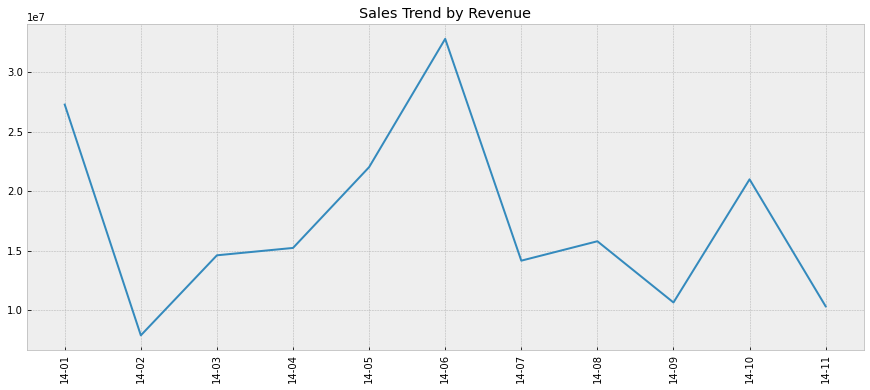

In [30]:
plt.style.use('bmh')
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['Revenue'])
plt.xticks(rotation='vertical', size=10)
plt.title('Sales Trend by Revenue')
plt.show()

# Sales by country

<AxesSubplot:title={'center':'Revenue by country'}, xlabel='Revenue', ylabel='Geography'>

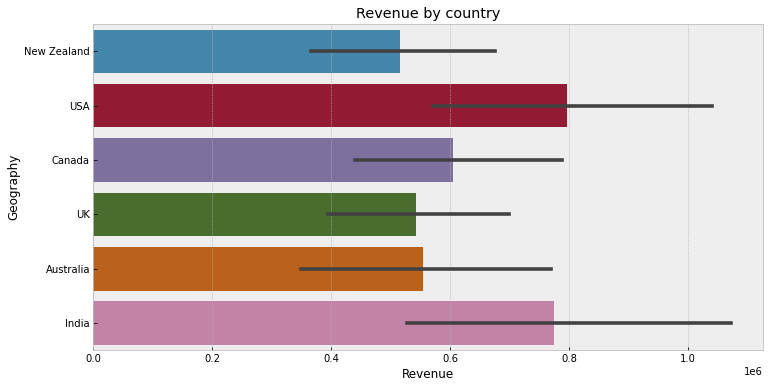

In [31]:
plt.figure(figsize = (12,6))
plt.title('Revenue by country')
sns.barplot(x ='Revenue', y='Geography', data=df )

In [72]:
df['Product'].value_counts()

Organic Choco Syrup     18
Baker's Choco Chips     17
Manuka Honey Choco      17
White Choc              17
Eclairs                 17
After Nines             16
70% Dark Bites          16
Mint Chip Choco         15
Fruit & Nut Bars        15
Caramel Stuffed Bars    15
99% Dark & Pure         14
Peanut Butter Cubes     13
Raspberry Choco         13
Milk Bars               13
Choco Coated Almonds    12
50% Dark Bites          11
Drinking Coco           11
Almond Choco            11
Smooth Sliky Salty      10
Orange Choco            10
Spicy Special Slims     10
85% Dark Bars            9
Name: Product, dtype: int64

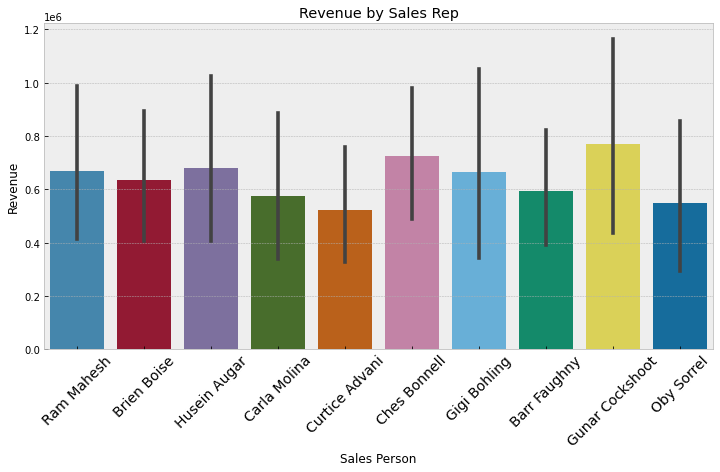

In [102]:
plt.figure(figsize = (12,6))
plt.title('Revenue by Sales Rep')
sns.barplot(x ='Sales Person', y='Revenue', data=df)
plt.xticks(rotation=45,size=14)
plt.show()

In [41]:
df['Geography'].value_counts()

India          58
New Zealand    53
USA            53
Canada         50
Australia      46
UK             40
Name: Geography, dtype: int64

In [86]:
prod_unit = pd.DataFrame(df.groupby('Product').sum()['Units'])

In [92]:
prod_unit.sort_values ('Units', ascending=False) 

,Units
Product,
Caramel Stuffed Bars,3207
Organic Choco Syrup,2982
Manuka Honey Choco,2976
70% Dark Bites,2802
Eclairs,2331
Choco Coated Almonds,2301
Orange Choco,2196
Mint Chip Choco,2154
Baker's Choco Chips,2142


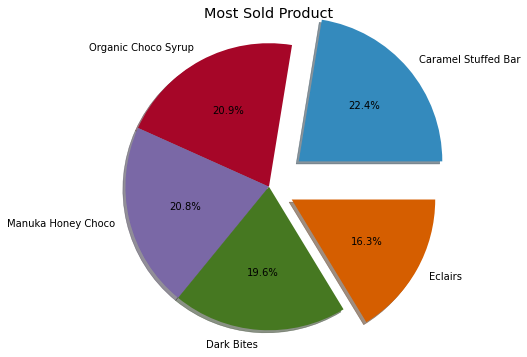

In [101]:
#THE MOST PRODUCT SOLD(Top FIVE)

plt.figure(figsize=(12,6))
plt.style.use('bmh')
slices=[3207,2982,2976,2802,2331]
explode= [0.3,0,0,0,0.2]
labels=['Caramel Stuffed Bar','Organic Choco Syrup','Manuka Honey Choco','Dark Bites','Eclairs']
plt.pie(slices, labels=labels,explode=explode,radius= 1.1, shadow=True,autopct='%1.1f%%')
plt.title('Most Sold Product')
plt.xticks(size=14)
plt.show()







In [93]:
prod_unit = pd.DataFrame(df.groupby('Product').sum()['Revenue'])

In [95]:
prod_unit.sort_values ('Revenue', ascending=False) 

,Revenue
Product,
Caramel Stuffed Bars,15466773
Choco Coated Almonds,15386112
Orange Choco,14105994
70% Dark Bites,12084324
Organic Choco Syrup,9836946
Baker's Choco Chips,9790893
Manuka Honey Choco,9762354
Raspberry Choco,9409596
Peanut Butter Cubes,9393615


#  Best Selling Product (Top FIVE)









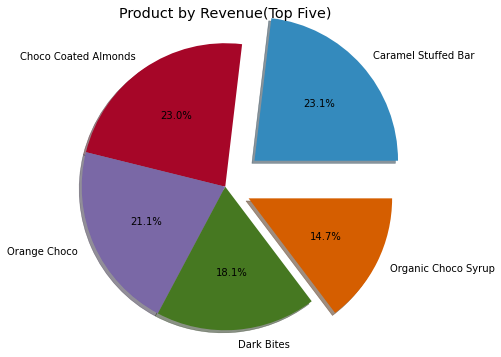

In [100]:
 plt.figure(figsize=(12,6))
plt.style.use('bmh')
slices=[15466773,15386112,14105994,12084324,9836946]
explode= [0.3,0,0,0,0.2]
labels=['Caramel Stuffed Bar','Choco Coated Almonds','Orange Choco ','Dark Bites','Organic Choco Syrup']
plt.pie(slices, labels=labels,explode=explode,radius= 1.1, shadow=True,autopct='%1.1f%%')
plt.title('Product by Revenue(Top Five)')
plt.xticks(size=14)
plt.show()